In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

In [2]:
# Read noisy heart rate data
df = pl.read_csv("noisy_heart_rate_time_series.csv")
time = df["t"].to_numpy()
hr_accurate_orig = df["heart_rate_accurate"].to_numpy()
hr_noisy_orig = df["heart_rate_noisy"].to_numpy()


In [3]:
# Normalize data
hr_accurate_mean = np.mean(hr_accurate_orig)
hr_accurate_std = np.std(hr_accurate_orig)
hr_accurate = (hr_accurate_orig - hr_accurate_mean) / hr_accurate_std
hr_noisy = (hr_noisy_orig - hr_accurate_mean) / hr_accurate_std

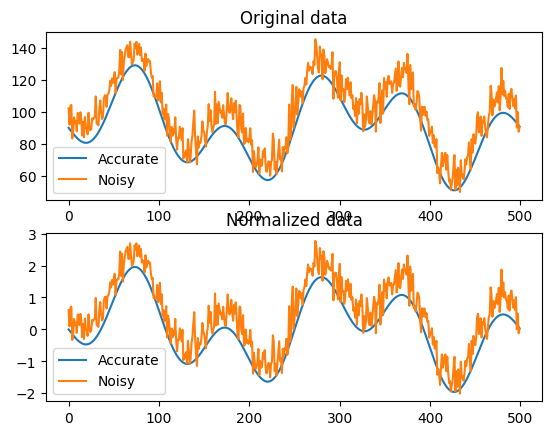

In [4]:
# PLot original data and normalized data
fig, ax = plt.subplots(2, 1)
ax[0].plot(time, hr_accurate_orig, label="Accurate")
ax[0].plot(time, hr_noisy_orig, label="Noisy")
ax[0].legend()
ax[0].set_title("Original data")
ax[1].plot(time, hr_accurate, label="Accurate")
ax[1].plot(time, hr_noisy, label="Noisy")
ax[1].legend()
ax[1].set_title("Normalized data")
plt.show()

In [5]:
w1 = 0.1
w2 = 0.1
b = 0.0
learning_rate = 0.005
# learning_rate = 0.1
# learning_rate_w1 = 0.00001
# learning_rate_w2 = 0.00001
# learning_rate_b = 0.1

n_epochs = 20

## To do: Use loss across whole epoch rather that sample-by-sample!

In [6]:
for _ in range(n_epochs):
    hr_pred = []
    y_prev = 0.0
    for x, y in zip(hr_noisy, hr_accurate):
        y_pred = w1 * x + w2 * y_prev + b
        hr_pred.append(y_pred)
        error = y - y_pred
        update = learning_rate * 2 * error
        w1 += update * x
        w2 += update * y_prev
        b += update
        y_prev = y_pred
    print(f"w1: {w1}, w2: {w2}, b: {b}")


w1: 0.5209839588110322, w2: 0.4125028929289412, b: -0.27030869063434276
w1: 0.45692715994536626, w2: 0.47992240875069214, b: -0.23564021082339232
w1: 0.40740826037169764, w2: 0.5315562046582781, b: -0.20849003535229152
w1: 0.36949817516456174, w2: 0.5704112361279403, b: -0.18779376034266657
w1: 0.34114050878174557, w2: 0.599005805051949, b: -0.1723436206546989
w1: 0.32048778634034086, w2: 0.619530701802087, b: -0.1610948369111568
w1: 0.305843579778074, w2: 0.6339079847859863, b: -0.15311297850477296
w1: 0.295706276804273, w2: 0.6437649414175453, b: -0.14758135151262888
w1: 0.2888261741201181, w2: 0.6504064094491783, b: -0.14382274298132636
w1: 0.2842270546461251, w2: 0.6548228582499341, b: -0.14130776910076803
w1: 0.28118651897085684, w2: 0.6577320058260752, b: -0.13964383239919778
w1: 0.2791919169915692, w2: 0.6596356905373995, b: -0.1385516886533304
w1: 0.2778903613680974, w2: 0.6608758609195852, b: -0.13783875233243129
w1: 0.2770440530815148, w2: 0.6616813715151278, b: -0.1373750621

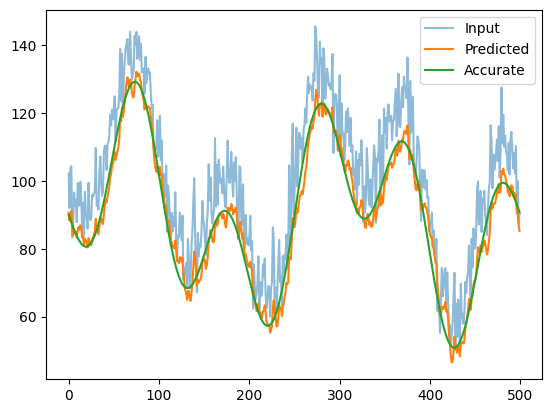

In [7]:
plt.plot(hr_noisy * hr_accurate_std + hr_accurate_mean, label="Input", alpha=0.5)
plt.plot(np.array(hr_pred) * hr_accurate_std + hr_accurate_mean, label="Predicted")
plt.plot(hr_accurate * hr_accurate_std + hr_accurate_mean, label="Accurate")
plt.legend()
plt.show()
